In [1]:
import ROOT as r
import sys
from operator import attrgetter, itemgetter
from itertools import combinations
from VBSAnalysis.EventIterator import EventIterator
from VBSAnalysis.Utils import JetSelectors as jsel
from VBSAnalysis import JetTagging 
import argparse
import myplotter as plotter
plotter.setStyle()

Welcome to JupyROOT 6.14/00


In [2]:
f = r.TFile("data/ewk_giacomo.root")

In [3]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eq_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    #("n_events", 1209750),
    ("Mjj_pair_250", 250)
    
]

In [28]:
i = 0
for event in EventIterator(f, criteria = cuts, pairing = True):
    #for i ,k  in combinations(range(len(event.jets)),2):
      #  print((event.jets[i]+ event.jets[k]).M())
    #print('--------')
    i = i+1
print(i)

1078799


In [22]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eq_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    #("Mjj_pair_250", 250),
    #("n_events", 10)
]

In [23]:
k = 0
for event in EventIterator(f, criteria = cuts, pairing = True):
    #for i ,k  in combinations(range(len(event.jets)),2):
      #  print((event.jets[i]+ event.jets[k]).M())
    #print('--------')
    k = k+1
print(i)

1209750


In [29]:
i/k

0.7953199344752491

In [3]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eq_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    ("atleastone_mjj_M", 250),
    #("n_events", 30)
]

In [4]:
hs_w = r.THStack("hs_w","Mjj W");
h_w = r.TH1F("mjj_w_good", "Mjj W good ", 60, 20, 150 )
h_w.SetLineColor(r.kRed)
h_w.SetFillColor(r.kRed)
h_w.SetFillStyle(3004)
hs_w.Add(h_w)
h_w_bad = r.TH1F("mjj_w_bad ", "Mjj W bad ", 60, 20, 150 )
h_w_bad.SetLineColor(r.kBlue)
h_w_bad.SetFillColor(r.kBlue)
h_w_bad.SetFillStyle(3005)
hs_w.Add(h_w_bad)

In [5]:
hs_z = r.THStack("hs_w","Mjj Z");
h_z = r.TH1F("mjj_z_good", "Mjj Z good ", 60, 20, 150 )
h_z.SetLineColor(r.kRed)
h_z.SetFillColor(r.kRed)
h_z.SetFillStyle(3004)
hs_z.Add(h_z)
h_z_bad = r.TH1F("mjj_z_bad ", "Mjj Z bad ", 60, 80, 150 )
h_z_bad.SetLineColor(r.kBlue)
h_z_bad.SetFillColor(r.kBlue)
h_z_bad.SetFillStyle(3005)
hs_z.Add(h_z_bad)

In [6]:
for event in EventIterator(f,criteria = cuts,pairing = True ):
    parton_pair = jsel.nearest_Z_or_W(event.partons)
    if parton_pair[2] == "w":
        jets_pair = jsel.nearest_W_pair(event.jets)
        print()
        associazione = JetTagging.check_association(event, parton_pair[0], [event.jets[i] for i in jets_pair])
        if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_w.Fill( (event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
        else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_w_bad.Fill((event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
    else:
        jets_pair = jsel.nearest_Z_pair(event.jets)
        associazione = JetTagging.check_association(event, parton_pair[0], [event.jets[i] for i in jets_pair])
        if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
            h_z.Fill( (event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
        else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
            h_z_bad.Fill((event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())

KeyboardInterrupt: 

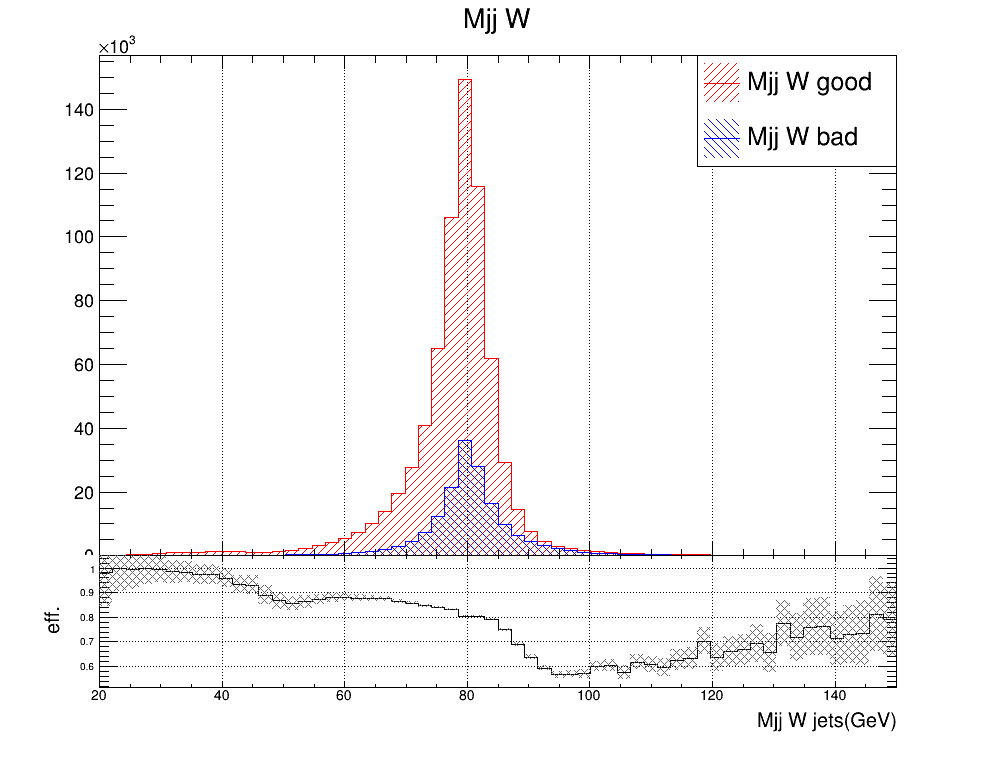

In [19]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_w.Draw("nostack hist")
legend = plotter.createLegend(h_w, h_w_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_w, h_w +h_w_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

# BREIT WIGNER TEST

 FCN=72683.1 FROM MIGRAD    STATUS=CONVERGED     343 CALLS         344 TOTAL
                     EDM=4.93212e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  k            1.64828e+05   3.20658e+02  -1.04796e+00   2.24556e-08
   2  Gamma        5.53779e+00   8.54321e-03   2.17493e-05  -2.13820e-03
   3  E0           7.92861e+01   6.23343e-03   3.72771e-05   5.02841e-03


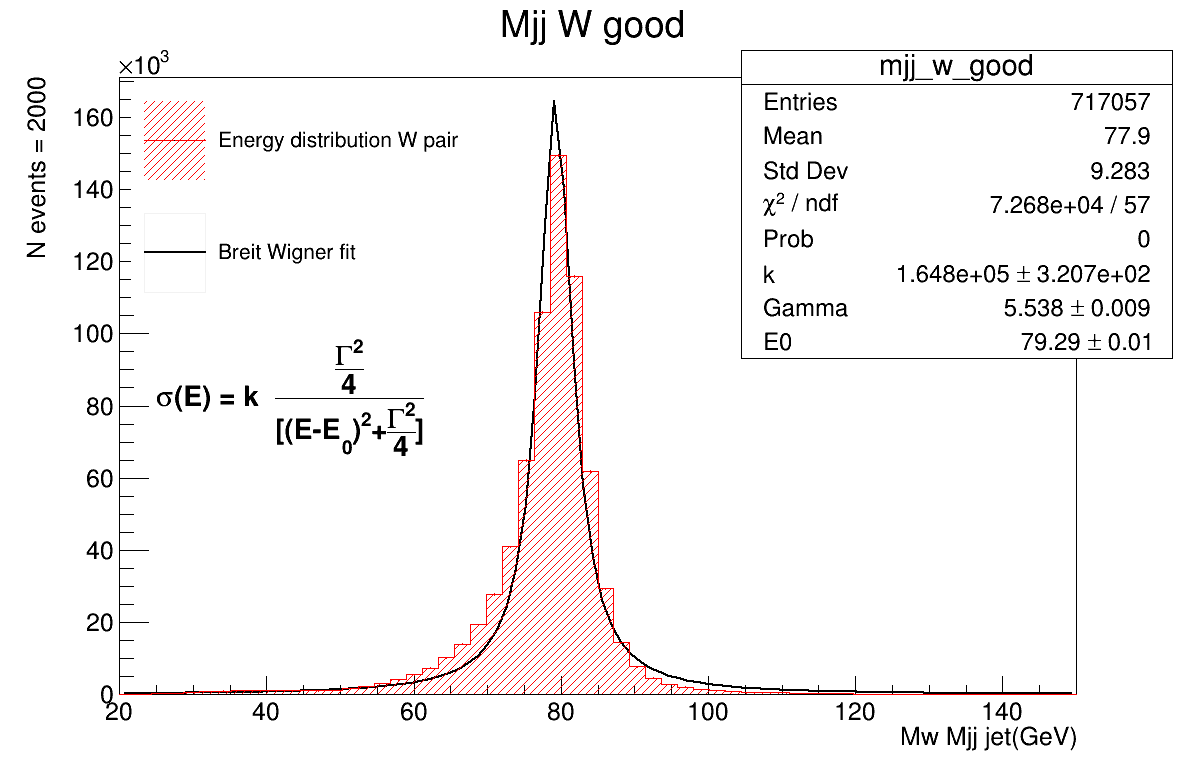

In [22]:
bw = r.TF1("fit", "[0]*(([1]^2)/4)/((x-[2])*(x-[2])+(([1]^2)/4))", 0, 150)
bw.SetParNames("k", "Gamma", "E0")
bw.SetLineColor(r.kBlack)
bw.SetLineStyle(1)
bw.SetLineWidth(2)
bw.SetParameters(0.0001, 150, 80, 0.5)
c2 = r.TCanvas("c2", "canvas", 50, 50, 1200, 800)
h_w.Fit("fit","r")
h_w.Draw("hist same")
h_w.GetXaxis().SetTitle("Mw Mjj jet(GeV)")
h_w.GetYaxis().SetTitle("N events = 2000")
l = r.TLegend(0.11,0.6,0.4,0.89)
l.AddEntry(h_w, "Energy distribution W pair")
l.AddEntry(bw,"Breit Wigner fit")
l.SetTextSize(0.03)
l.SetBorderSize(0)
l.Draw()
c = r.TLatex(25,80000,"#sigma(E) = k #frac{#frac{#Gamma^{2}}{4}}{[(E-E_{0})^{2}+#frac{#Gamma^{2}}{4}]}")
c.SetTextSize(0.04)
c.Draw()
c2.Draw()

INFO:ROOT.TH1F.Add] Attempt to add histograms with different axis limits - trying to use TH1::Merge
ERROR:ROOT.Merge] Cannot merge histograms - limits are inconsistent:
 first: mjj_z_good (60, 20.000000, 150.000000), second: mjj_z_bad  (60, 80.000000, 150.000000)


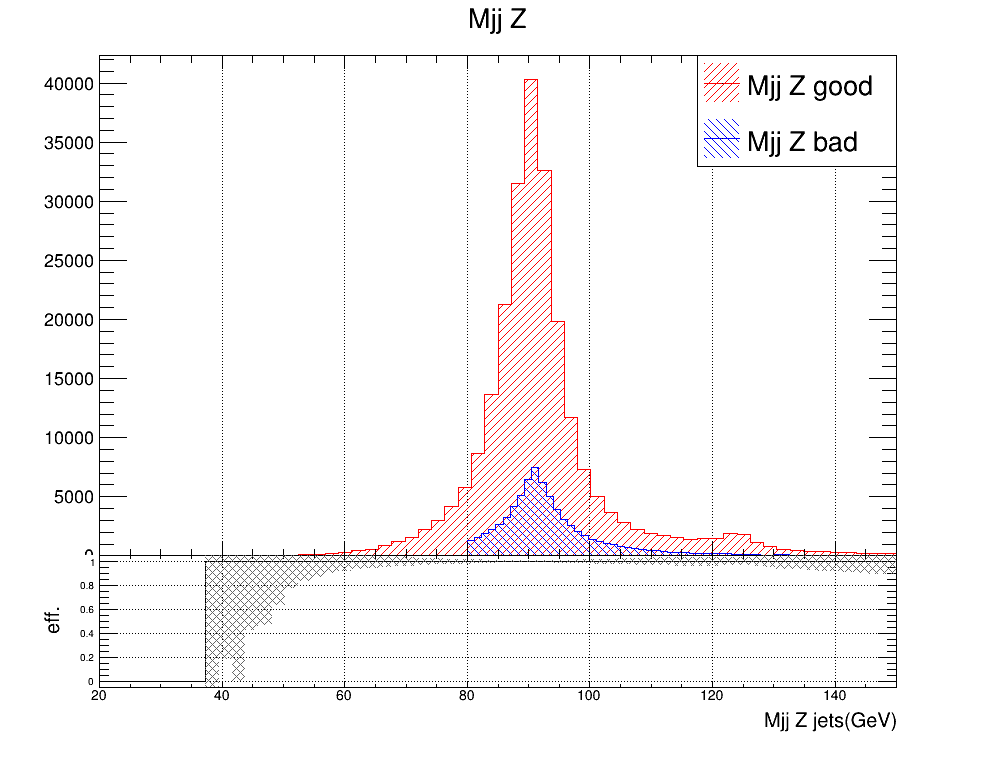

In [20]:
c2, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_z.Draw("nostack hist")
legend = plotter.createLegend(h_z, h_z_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_z, h_z +h_z_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj Z jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c2.Draw()

 FCN=74338.9 FROM MIGRAD    STATUS=CONVERGED     303 CALLS         304 TOTAL
                     EDM=3.39462e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  k            4.80268e+04   1.73675e+02   1.25267e-01  -2.91636e-07
   2  Gamma        4.87493e+00   1.33092e-02   3.21631e-06  -2.21834e-03
   3  E0           9.08266e+01   1.44478e-02  -2.61768e-06   1.82550e-05


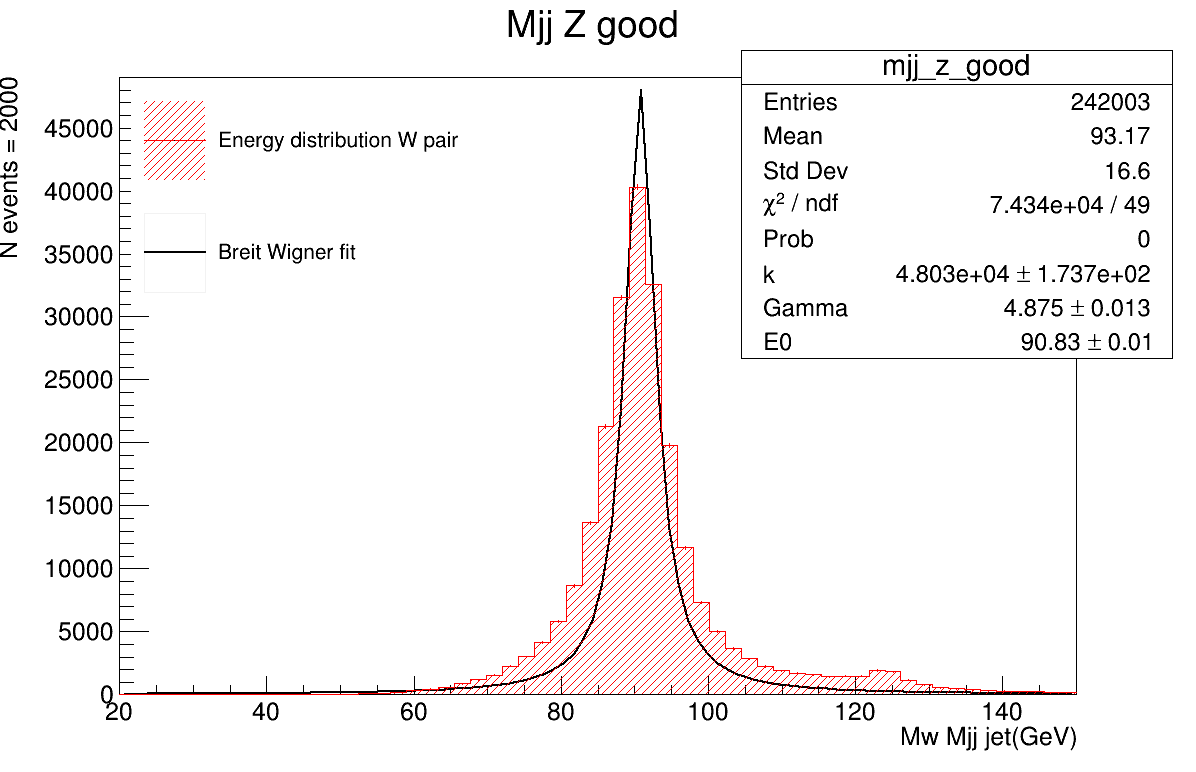

In [23]:
bw = r.TF1("fit", "[0]*(([1]^2)/4)/((x-[2])*(x-[2])+(([1]^2)/4))", 0, 150)
bw.SetParNames("k", "Gamma", "E0")
bw.SetLineColor(r.kBlack)
bw.SetLineStyle(1)
bw.SetLineWidth(2)
bw.SetParameters(0.0001, 150, 80, 0.5)
c2 = r.TCanvas("c2", "canvas", 50, 50, 1200, 800)
h_z.Fit("fit","r")
h_z.Draw("hist same")
h_z.GetXaxis().SetTitle("Mw Mjj jet(GeV)")
h_z.GetYaxis().SetTitle("N events = 2000")
l = r.TLegend(0.11,0.6,0.4,0.89)
l.AddEntry(h_z, "Energy distribution W pair")
l.AddEntry(bw,"Breit Wigner fit")
l.SetTextSize(0.03)
l.SetBorderSize(0)
l.Draw()
c = r.TLatex(25,80000,"#sigma(E) = k #frac{#frac{#Gamma^{2}}{4}}{[(E-E_{0})^{2}+#frac{#Gamma^{2}}{4}]}")
c.SetTextSize(0.04)
c.Draw()
c2.Draw()

# Test mjj_mw

In [7]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eq_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    ("atleastone_mjj_M", 250)
    #("n_events", 10)
]

In [42]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_w, h_w, h_w_bad = plotter.StackCreator1("W/Z Mjj jets", "W/Z good", "W/Z bad")

In [43]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj, h_mjj, h_mjj_bad = plotter.StackCreator2(" Mjj jets", " good", " bad")

In [44]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_mw(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair[0], jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_w.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_w_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

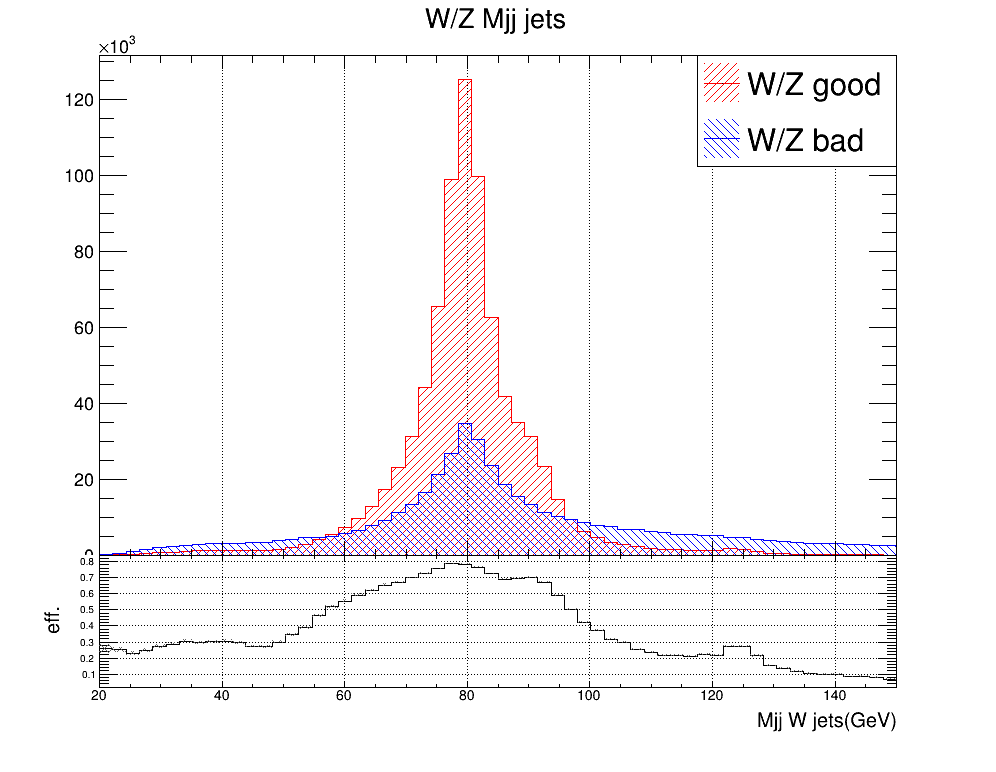

In [45]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_w.Draw("nostack hist")
legend = plotter.createLegend(h_w, h_w_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_w, h_w +h_w_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

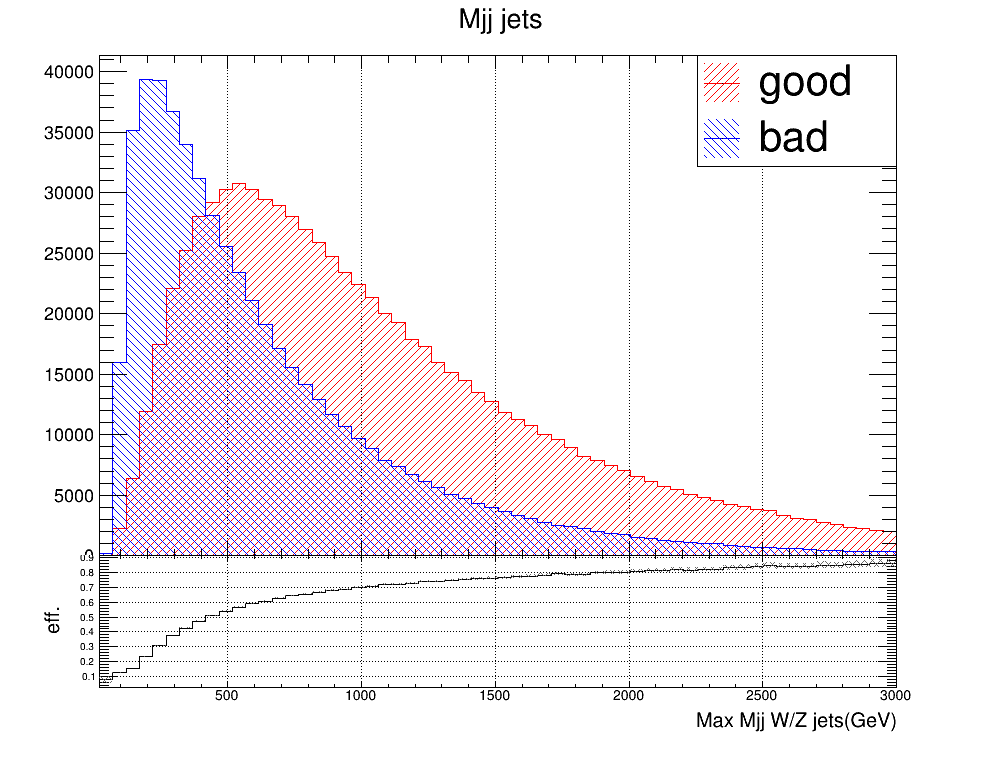

In [46]:
c3, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj, h_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj, h_mjj +h_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max Mjj W/Z jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c3.Draw()

In [47]:
print(cwrt/(cwrt+cwrg))

0.5393141133295096


# Test mjj_mz

In [48]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_w, h_w, h_w_bad = plotter.StackCreator1("W/Z Mjj jets", "W/Z good", "W/Z bad")

In [49]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj, h_mjj, h_mjj_bad = plotter.StackCreator2(" Mjj jets", " good", " bad")

In [50]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_mz(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair[0], jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_w.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_w_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

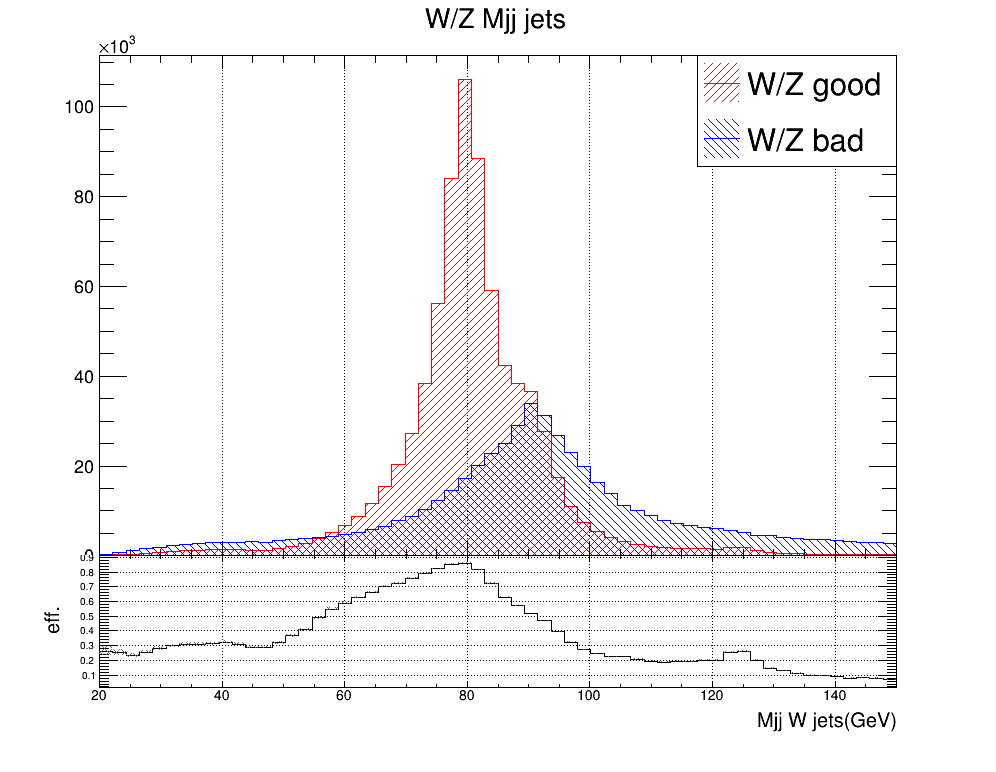

In [51]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_w.Draw("nostack hist")
legend = plotter.createLegend(h_w, h_w_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_w, h_w +h_w_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

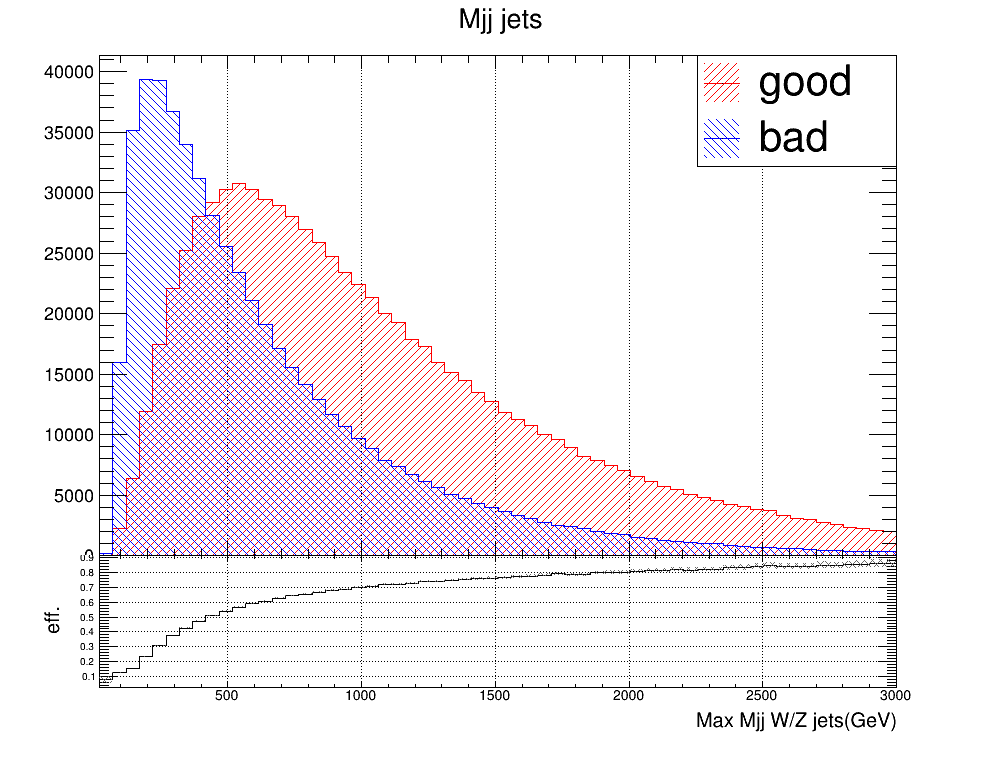

In [52]:
c3, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj, h_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj, h_mjj +h_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max Mjj W/Z jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c3.Draw()

In [53]:
print(cwrt/(cwrt+cwrg))

0.5088445143663459


# Test mz_mjj

In [4]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_w, h_w, h_w_bad = plotter.StackCreator1("W/Z Mjj jets", "W/Z good", "W/Z bad")

In [5]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj, h_mjj, h_mjj_bad = plotter.StackCreator2(" Mjj jets", " good", " bad")

In [7]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mz_mjj(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_w.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_w_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

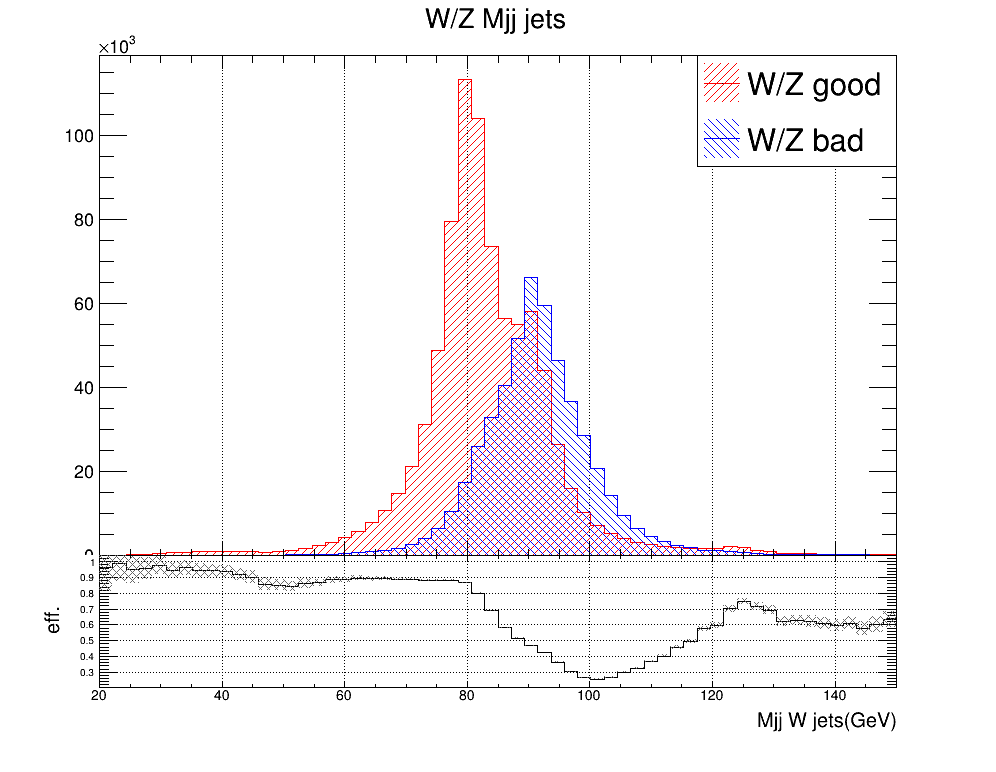

In [8]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_w.Draw("nostack hist")
legend = plotter.createLegend(h_w, h_w_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_w, h_w +h_w_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

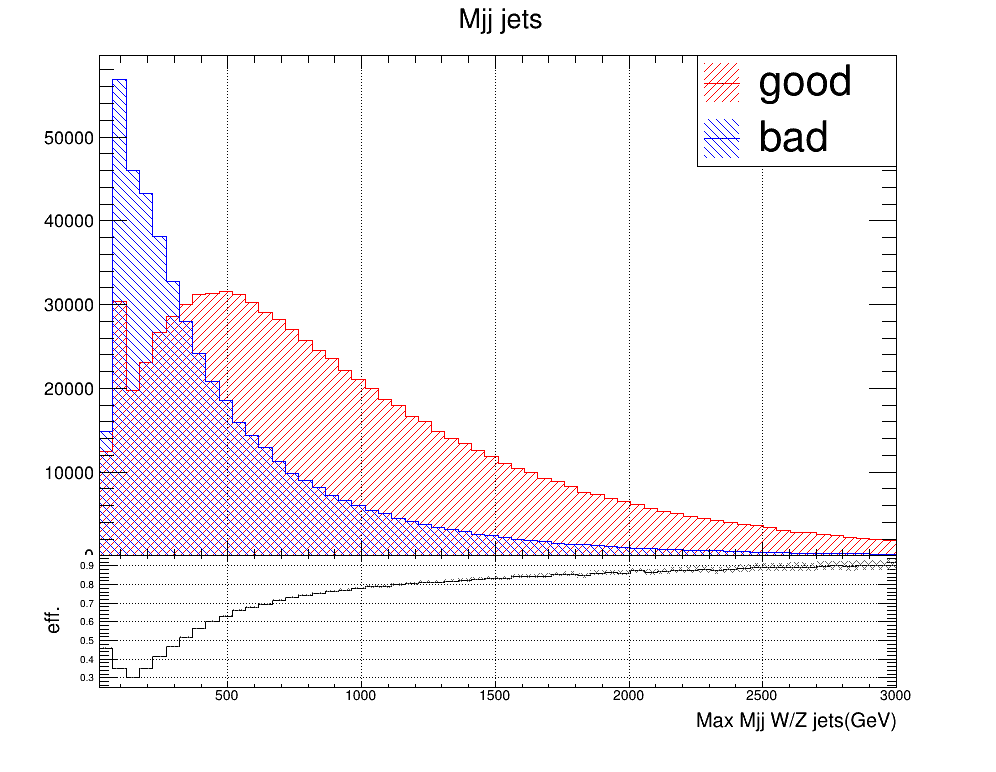

In [9]:
c3, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj, h_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj, h_mjj +h_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max Mjj W/Z jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c3.Draw()

In [10]:
print(cwrt/(cwrt+cwrg))

0.5596461014689988


# Test mjj_wz

In [10]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_w, h_w, h_w_bad = plotter.StackCreator1("W/Z Mjj jets", "W/Z good", "W/Z bad")

In [11]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj, h_mjj, h_mjj_bad = plotter.StackCreator2(" Mjj jets", " good", " bad")

In [12]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_mjj_wz(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_w.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_w_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

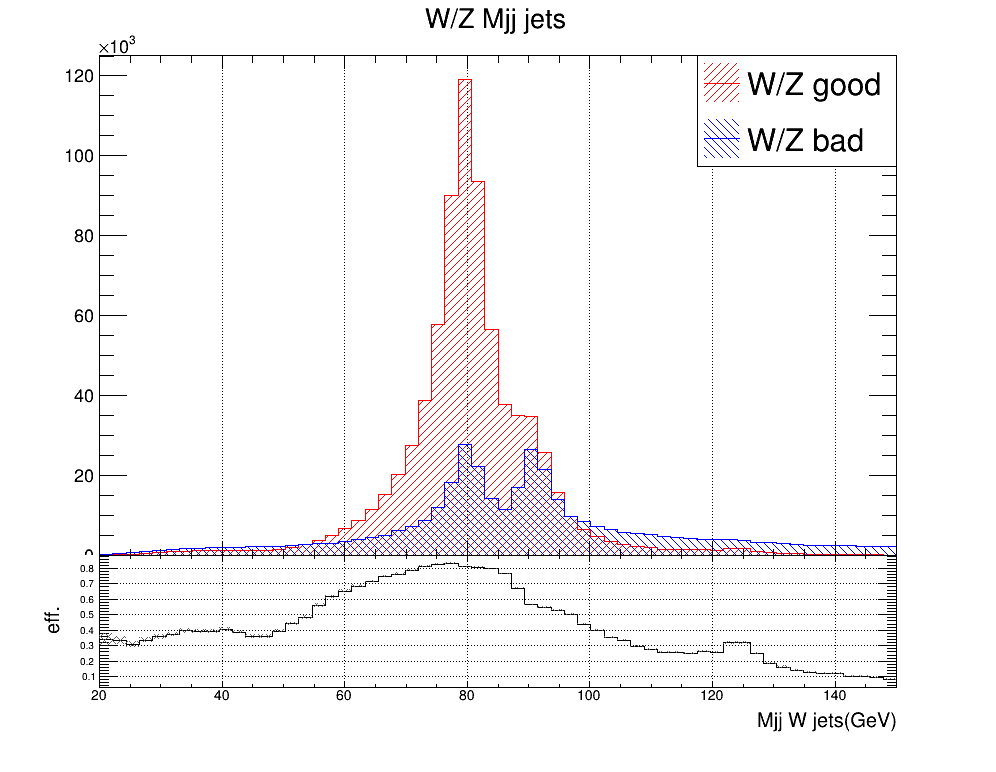

In [13]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_w.Draw("nostack hist")
legend = plotter.createLegend(h_w, h_w_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_w, h_w +h_w_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

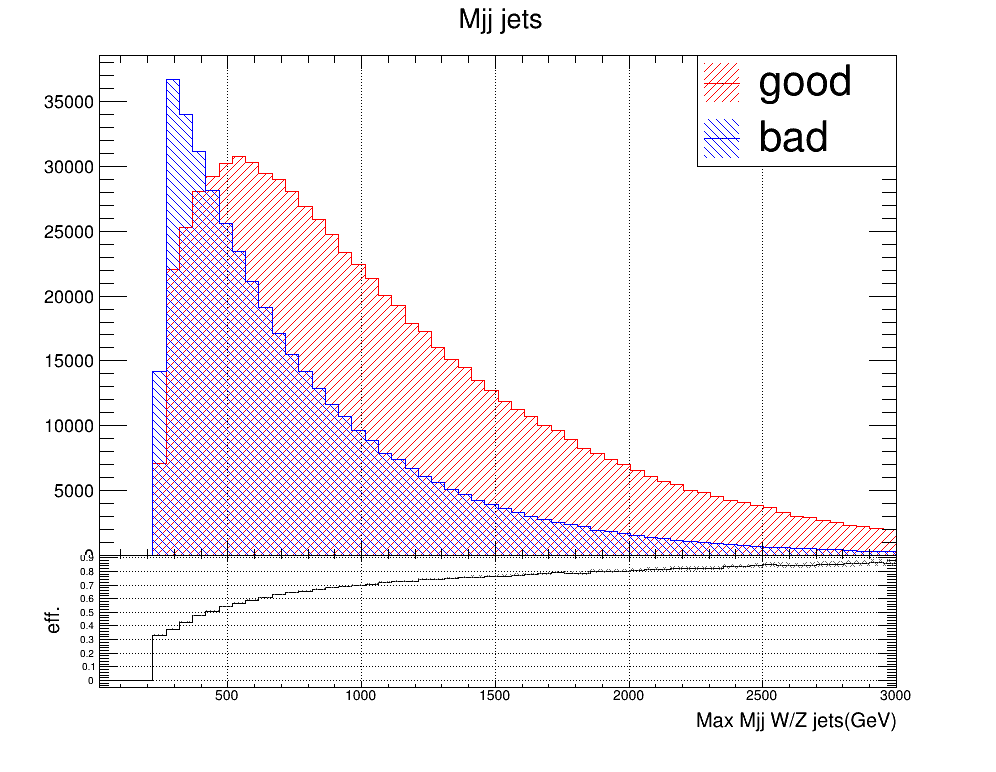

In [14]:
c3, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj, h_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj, h_mjj +h_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max Mjj W/Z jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c3.Draw()

In [15]:
print(cwrt/(cwrt+cwrg))

0.570732796032238


# Test wz_mjj

In [19]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_w, h_w, h_w_bad = plotter.StackCreator1("W/Z Mjj jets", "W/Z good", "W/Z bad")

In [20]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj, h_mjj, h_mjj_bad = plotter.StackCreator2(" Mjj jets", " good", " bad")

In [21]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_wz_mjj(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_w.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_w_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

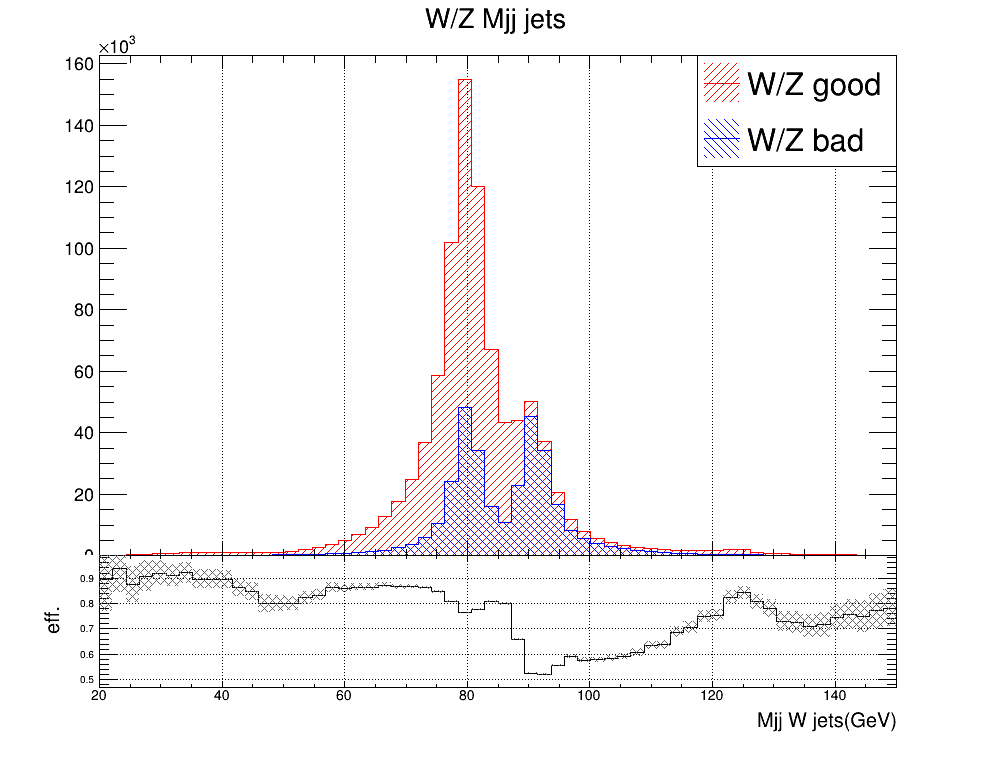

In [22]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_w.Draw("nostack hist")
legend = plotter.createLegend(h_w, h_w_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_w, h_w +h_w_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

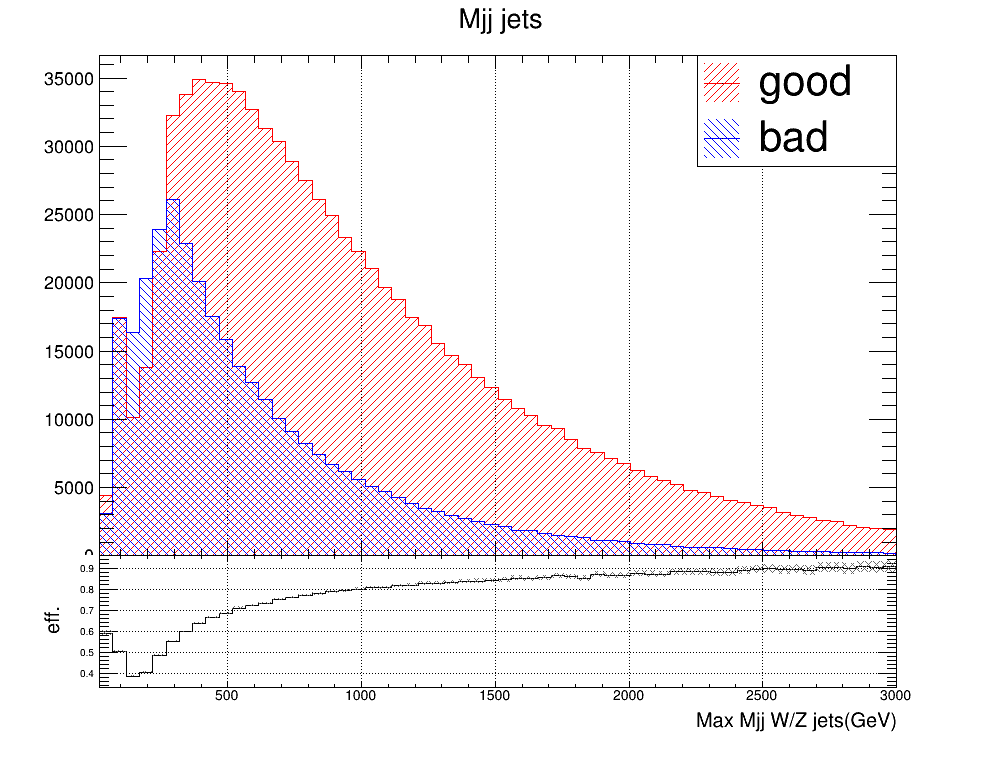

In [23]:
c3, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj, h_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj, h_mjj +h_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max Mjj W/Z jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c3.Draw()

In [24]:
print(cwrt/(cwrt+cwrg))

0.6539243645381277


# Test jet size min

In [2]:
hs_w = r.THStack("hs_w","Mjj W");
h_w = r.TH1F("mjj_w_good", "Mjj W good ", 60, 20, 150 )
h_w.SetLineColor(r.kRed)
h_w.SetFillColor(r.kRed)
h_w.SetFillStyle(3004)
hs_w.Add(h_w)
h_w_bad = r.TH1F("mjj_w_bad ", "Mjj W bad ", 60, 20, 150 )
h_w_bad.SetLineColor(r.kBlue)
h_w_bad.SetFillColor(r.kBlue)
h_w_bad.SetFillStyle(3005)
hs_w.Add(h_w_bad) 

In [2]:
f = r.TFile("data/ewk_giacomo.root")

In [7]:
cuts = [
    ("pt_min_jets",30),
    ("min_njets",4),
    #("eq_njets",4),
    #("eta_max_jets", 2),
    ("eq_flag", 0),
    ("atleastone_mjj_M", 250),
    #("n_events", 30)
]

In [5]:
for event in EventIterator(f,criteria = cuts,pairing = True ):
    parton_pair = jsel.nearest_Z_or_W(event.partons)
    jets_pair = jsel.jet_min_size_pair(event.jets)
    associazione = JetTagging.check_association(event, parton_pair, [event.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
        h_w.Fill( (event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
        h_w_bad.Fill((event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())

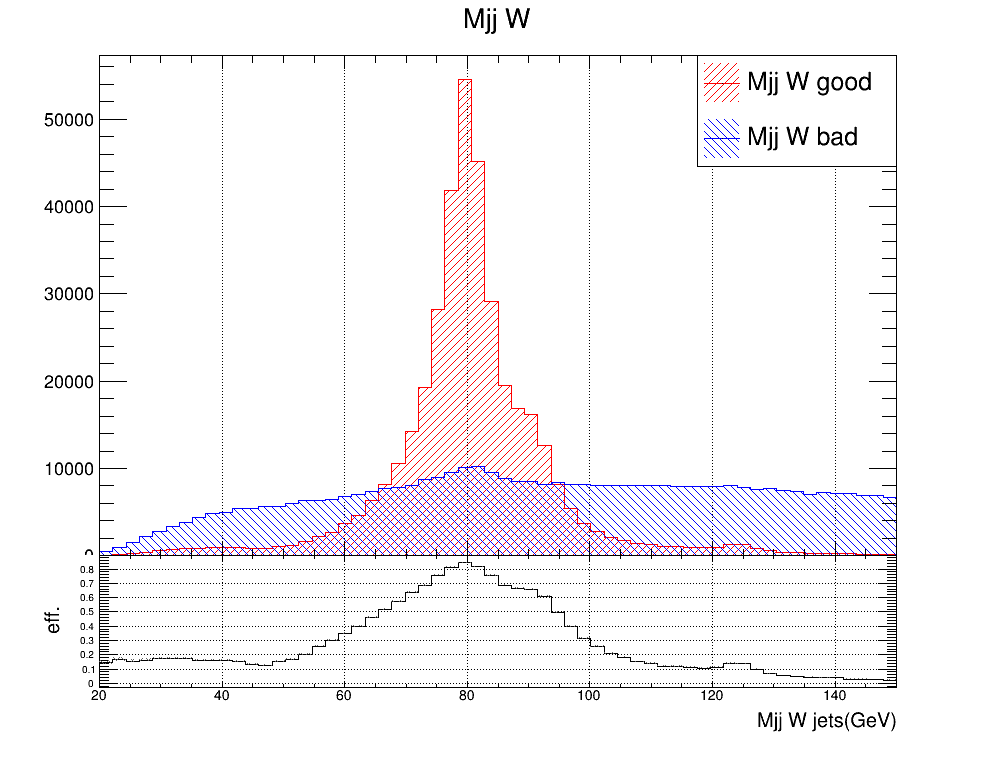

In [6]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_w.Draw("nostack hist")
legend = plotter.createLegend(h_w, h_w_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_w, h_w +h_w_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

# Test jet size max

In [4]:
hs_w = r.THStack("hs_w","Mjj W");
h_w = r.TH1F("mjj_w_good", "Mjj W good ", 60, 20, 3000 )
h_w.SetLineColor(r.kRed)
h_w.SetFillColor(r.kRed)
h_w.SetFillStyle(3004)
hs_w.Add(h_w)
h_w_bad = r.TH1F("mjj_w_bad ", "Mjj W bad ", 60, 20, 3000 )
h_w_bad.SetLineColor(r.kBlue)
h_w_bad.SetFillColor(r.kBlue)
h_w_bad.SetFillStyle(3005)
hs_w.Add(h_w_bad) 

In [5]:
for event in EventIterator(f,criteria = cuts,pairing = True ):
    parton_pair = jsel.tag_parton_pair(event.partons)
    jets_pair = jsel.jet_max_size_pair(event.jets)
    associazione = JetTagging.check_association(event, parton_pair, [event.jets[i] for i in jets_pair])
    if associazione:
        #se l'associazione va a buon fine restituisce TRUE e riempio l'histo con la massa dei due getti
        h_w.Fill( (event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())
    else :
        #se l'associazione non va a buon fine restituisce FALSE e inserisco nel secondo histo la massa dei due getti
        h_w_bad.Fill((event.jets[jets_pair[0]]+ event.jets[jets_pair[1]]).M())

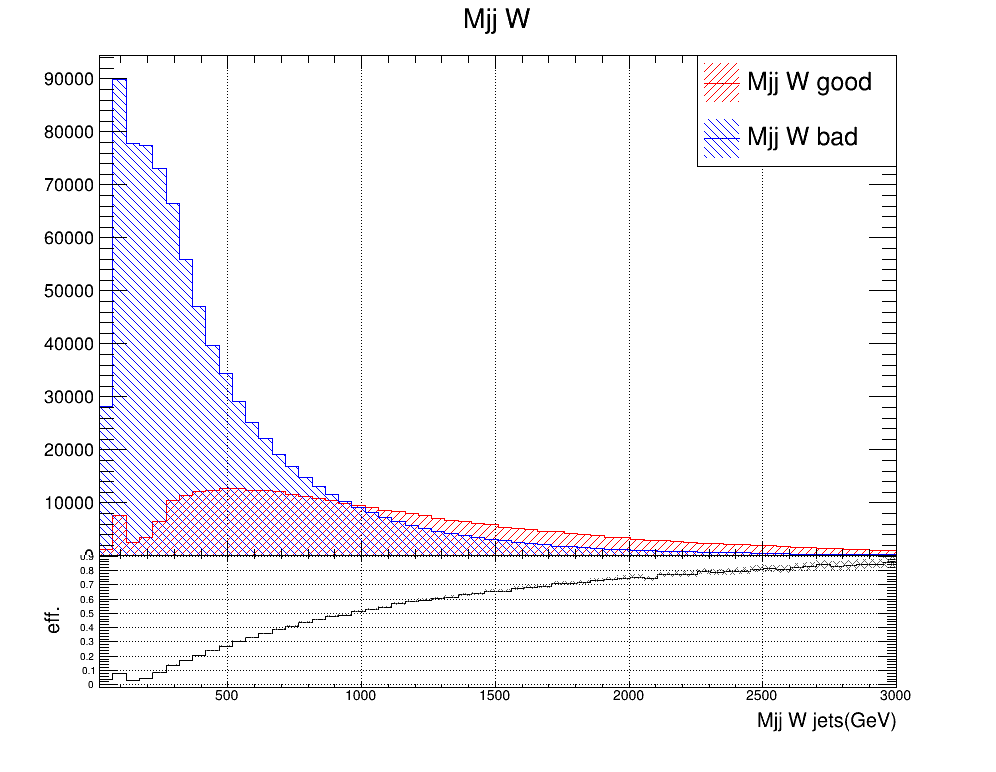

In [6]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_w.Draw("nostack hist")
legend = plotter.createLegend(h_w, h_w_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_w, h_w +h_w_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

# TEST TAGGING MINSIZE_MAXSIZE

In [8]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_w, h_w, h_w_bad = plotter.StackCreator1("minsize Mjj jets", "minsize good", "minsize bad")

In [9]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj, h_mjj, h_mjj_bad = plotter.StackCreator2(" Mjj maxsize jets", "maxsize good", "maxsize bad")

In [10]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_minsize_maxsize(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_w.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_w_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

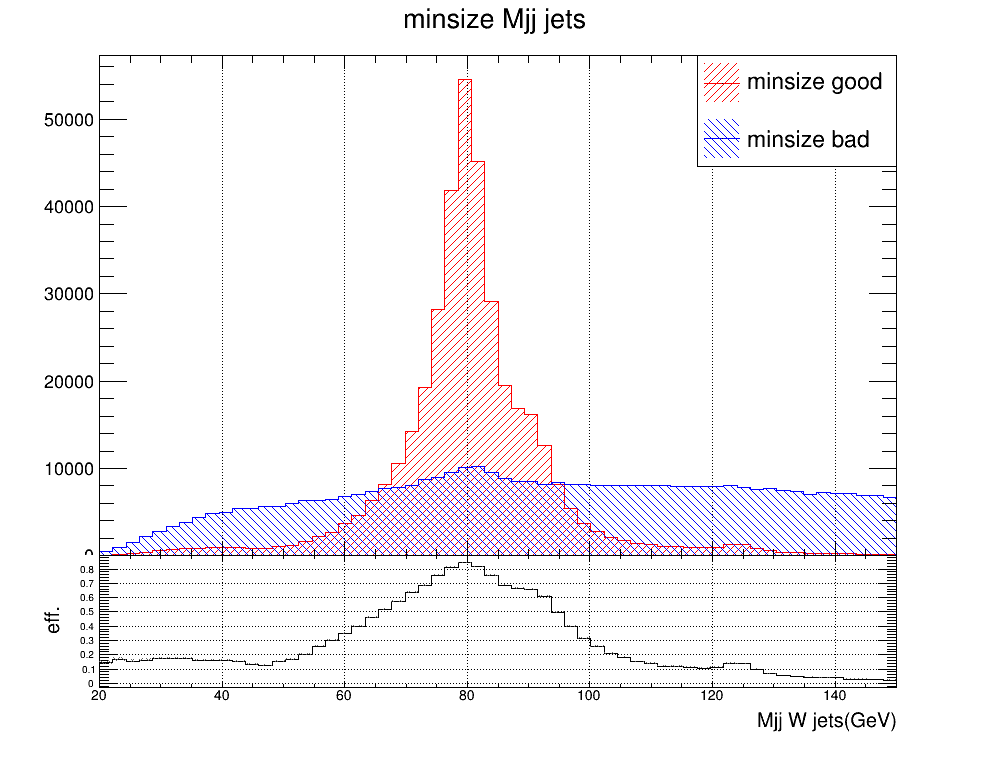

In [11]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_w.Draw("nostack hist")
legend = plotter.createLegend(h_w, h_w_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_w, h_w +h_w_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

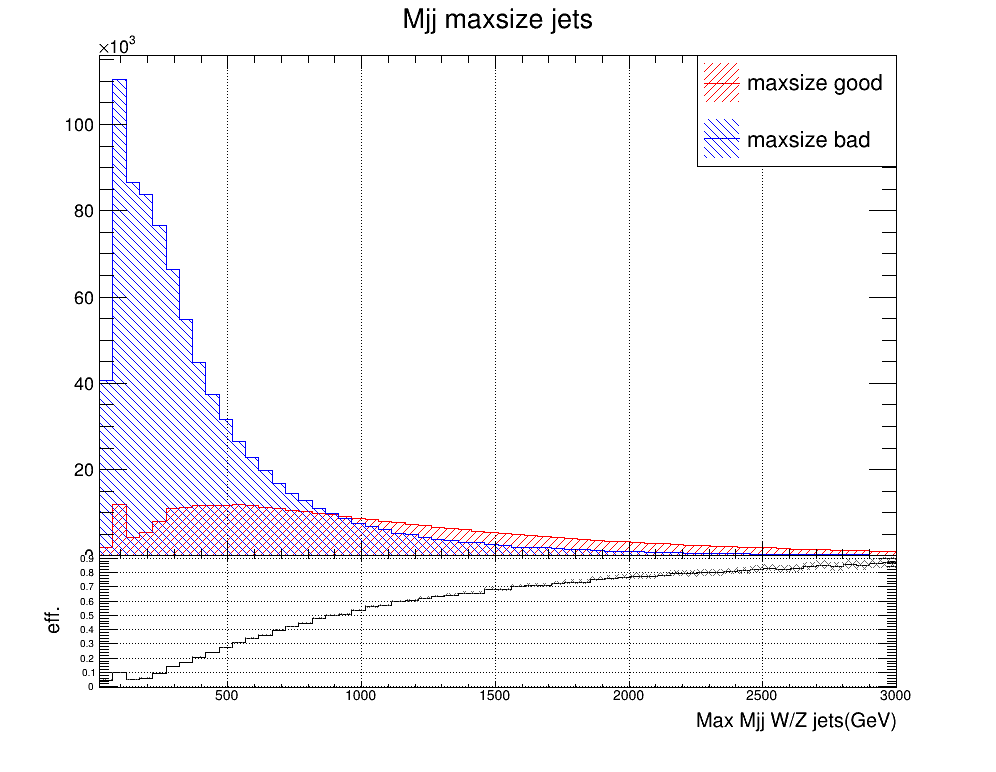

In [12]:
c3, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj, h_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj, h_mjj +h_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max Mjj W/Z jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c3.Draw()

In [13]:
print(cwrt/(cwrt+cwrg))

0.2506873320934077


# TEST TAGGING MINSIZE_MAXSIZE

In [8]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_w, h_w, h_w_bad = plotter.StackCreator1("minsize Mjj jets", "minsize good", "minsize bad")

In [9]:
#definisco uno stack per le associazioni getti partoni con strategia mjj maxpt (seleziono prima
#i due getti con massa invariante + grande e, dai rimanenti, seleziono quelli con massimo momento trasverso)
#stack per massima massa invariante
hs_mjj, h_mjj, h_mjj_bad = plotter.StackCreator2(" Mjj maxsize jets", "maxsize good", "maxsize bad")

In [10]:
cwrt=0
cwrg=0
for evento in EventIterator(f,criteria = cuts, pairing = True) :
    #pairing = True quindi PairingTreeDriver
    #applichiamo la strategia sia ai partoni che ai getti per vedere il rendimento della strategia
    partons_pair1 = JetTagging.strategy_partons2(evento.partons)
    jets_pair1 = JetTagging.strategy_maxsize_minsize(evento.jets)
    associazione = JetTagging.check_association(evento, partons_pair1.vbs_pair, jets_pair1.vbsjets)
    associazione2 = JetTagging.check_association(evento, partons_pair1.w_pair, jets_pair1.vjets)
    if associazione:
        #due getti con massimo pt indici corrispondono a partoni
        h_mjj.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    else:
        #due getti con massimo pt indici NON corrispondono a partoni
        h_mjj_bad.Fill((jets_pair1.vbsjets[0]+jets_pair1.vbsjets[1]).M())
    if associazione2:
        #due getti con massa invariante più grande indici corrispondono a partoni
        h_w.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    else:
         #due getti con massa invariante più grande indici NON corrispondono a partoni
        h_w_bad.Fill((jets_pair1.vjets[0]+jets_pair1.vjets[1]).M())
    if associazione and associazione2:
        cwrt = cwrt +1
    else:
        cwrg = cwrg +1

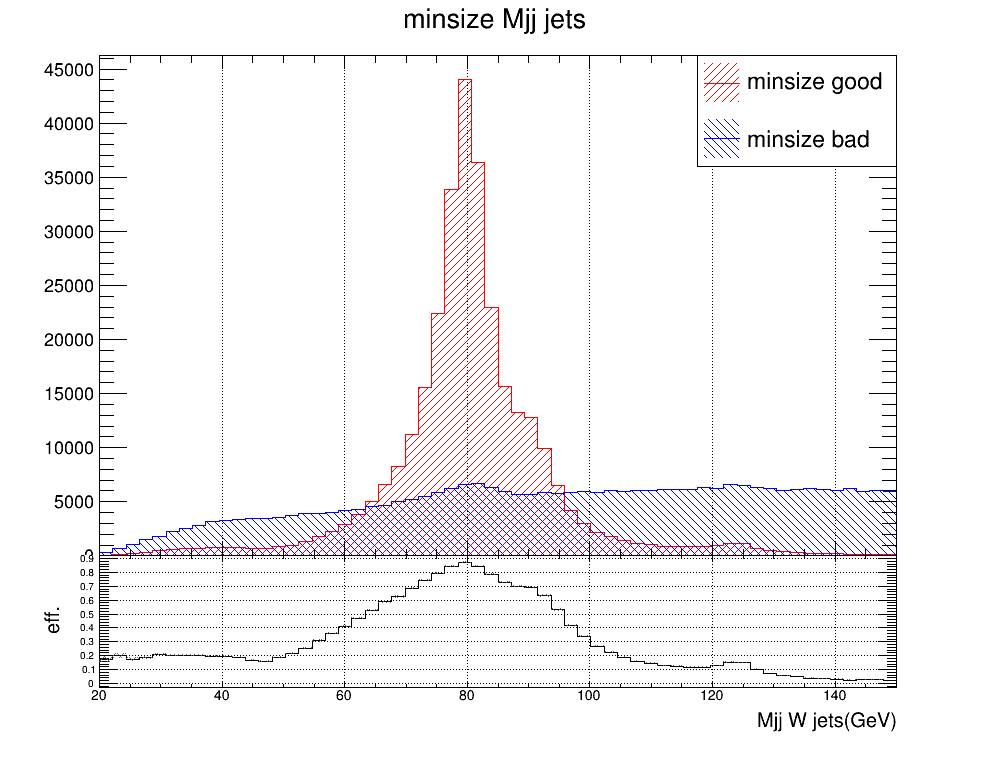

In [11]:
c1, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_w.Draw("nostack hist")
legend = plotter.createLegend(h_w, h_w_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_w, h_w +h_w_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Mjj W jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c1.Draw()

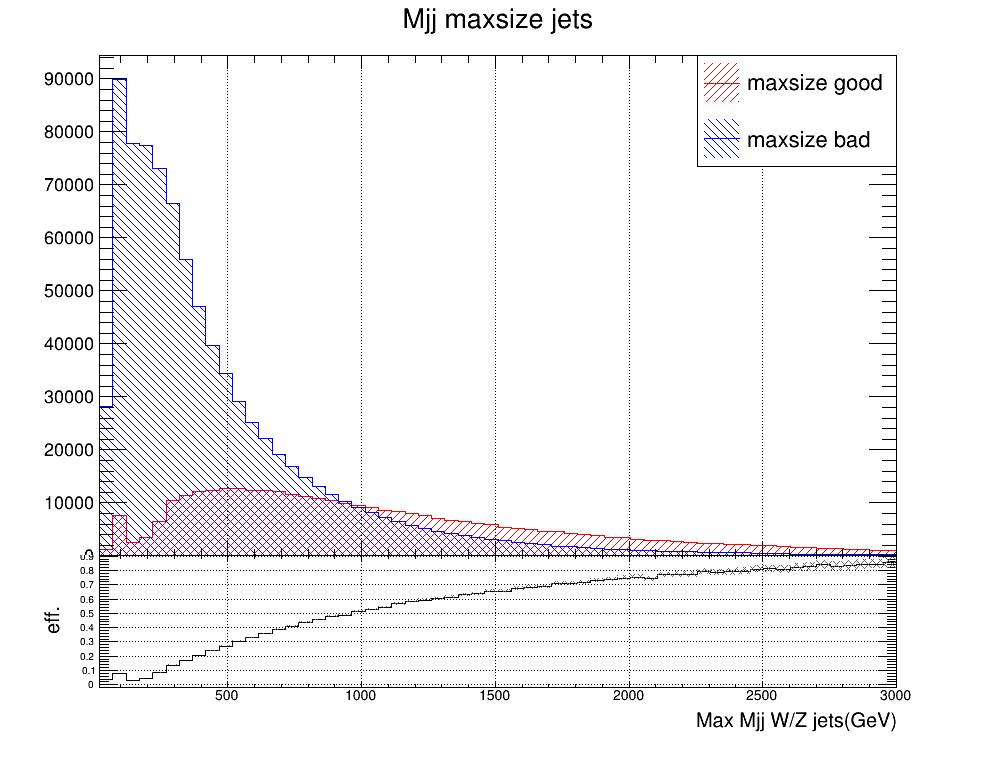

In [12]:
c3, pad1, pad2 = plotter.createCanvasPads()
pad1.cd()
hs_mjj.Draw("nostack hist")
legend = plotter.createLegend(h_mjj, h_mjj_bad,1)
legend.Draw()
pad2.cd()
hratio = plotter.createRatio(h_mjj, h_mjj +h_mjj_bad, "eff.")
hratio.Draw("hist")
hratio.SetFillColor(0)
hratioerror = hratio.DrawCopy("E2 same")
hratioerror.SetFillStyle(3013)
hratioerror.SetFillColor(13)
hratioerror.SetMarkerStyle(1)
hratio = plotter.RatioDrawOptions(hratio, "Max Mjj W/Z jets(GeV)")
#hratio.GetXaxis().SetLabelSize(0.07)
c3.Draw()

In [13]:
print(cwrt/(cwrt+cwrg))

0.2320934077288696
